In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?', low_memory=False)

In [4]:
df_new = df.copy()
df_new['Date_time'] = df_new['Date'] + ' ' + df_new['Time']
df_new.drop(columns=['Date', 'Time'], inplace=True)
df_new = df_new.set_index('Date_time')
df_new.index = pd.to_datetime(df_new.index, dayfirst=True)
df_new['Date_time'] = df_new.index
df_new['Hour'] = df_new['Date_time'].dt.hour
df_new['Day_of_week'] = df_new['Date_time'].dt.dayofweek
df_new['Month'] = df_new['Date_time'].dt.month
df_new['Is_weekend'] = df_new['Day_of_week'].isin([5, 6]).astype(int)
df_new = df_new.dropna(subset=['Global_active_power'])
df_new['Global_active_power'] = df_new['Global_active_power'].astype(float)

In [5]:
df_train = df_new.drop(columns=['Global_active_power', 'Date_time'])
X = df_train
y = df_new['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Linear Regression Model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print('R² Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

R² Score: 0.9985584278847457
RMSE: 0.04025227425430602
Mean Absolute Error: 0.025751250413549902


In [7]:
# Normalize Features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Artificial Neural Network Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train_scaled, y_train, epochs=3, validation_split=0.2)

C:\Users\Kaushik\jupyter_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 0.0825 - mae: 0.0883 - val_loss: 0.0015 - val_mae: 0.0237
Epoch 2/3
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - loss: 0.0016 - mae: 0.0251 - val_loss: 0.0013 - val_mae: 0.0217
Epoch 3/3
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - loss: 0.0014 - mae: 0.0240 - val_loss: 0.0013 - val_mae: 0.0215


In [9]:
y_pred_ann = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred_ann)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ann))
mae = mean_absolute_error(y_test, y_pred_ann)

print("ANN R² Score:", r2)
print("ANN RMSE:", rmse)
print("ANN MAE:", mae)

12808/12808 ━━━━━━━━━━━━━━━━━━━━ 8s 622us/step
ANN R² Score: 0.9988763417748368
ANN RMSE: 0.03553770304996159
ANN MAE: 0.021512598287701152


In [10]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 4.61%


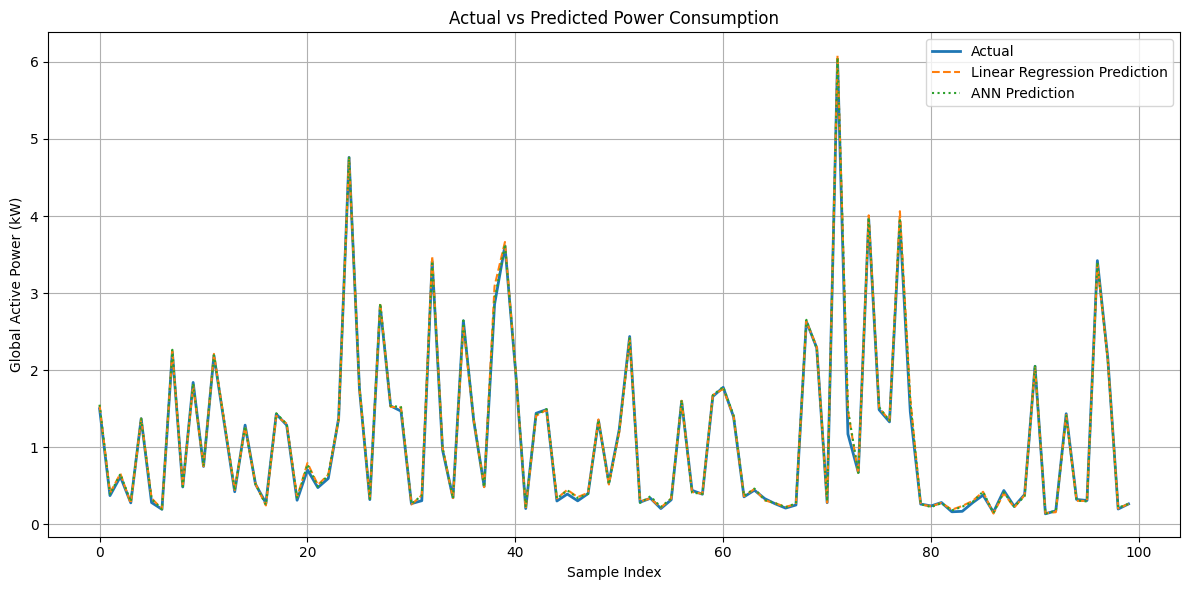

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(y_pred[:100], label='Linear Regression Prediction', linestyle='--')
plt.plot(y_pred_ann[:100], label='ANN Prediction', linestyle=':')
plt.xlabel('Sample Index')
plt.ylabel('Global Active Power (kW)')
plt.title('Actual vs Predicted Power Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

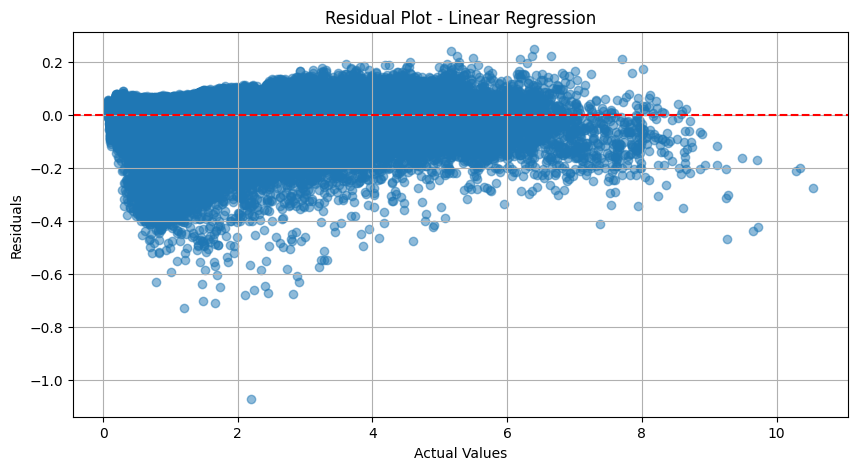

In [12]:
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.grid(True)
plt.show()

In [14]:
real_sample = df_new[df_new.index.date == pd.to_datetime('2010-06-01').date()]
X_real = real_sample.drop(columns=['Global_active_power', 'Date_time'])
X_real_scaled = scaler.transform(X_real)
predictions = model.predict(X_real_scaled)
result_df = real_sample.copy()
result_df['Predicted_Global_active_power'] = predictions

# Show top results
print(result_df[['Global_active_power', 'Predicted_Global_active_power']].head(10))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
                     Global_active_power  Predicted_Global_active_power
Date_time                                                              
2010-06-01 00:00:00                0.326                       0.323345
2010-06-01 00:01:00                0.282                       0.283368
2010-06-01 00:02:00                0.234                       0.236727
2010-06-01 00:03:00                0.312                       0.329091
2010-06-01 00:04:00                0.326                       0.324524
2010-06-01 00:05:00                0.322                       0.322422
2010-06-01 00:06:00                0.320                       0.322411
2010-06-01 00:07:00                0.320                       0.323417
2010-06-01 00:08:00                0.322                       0.325348
2010-06-01 00:09:00                0.322                       0.322705


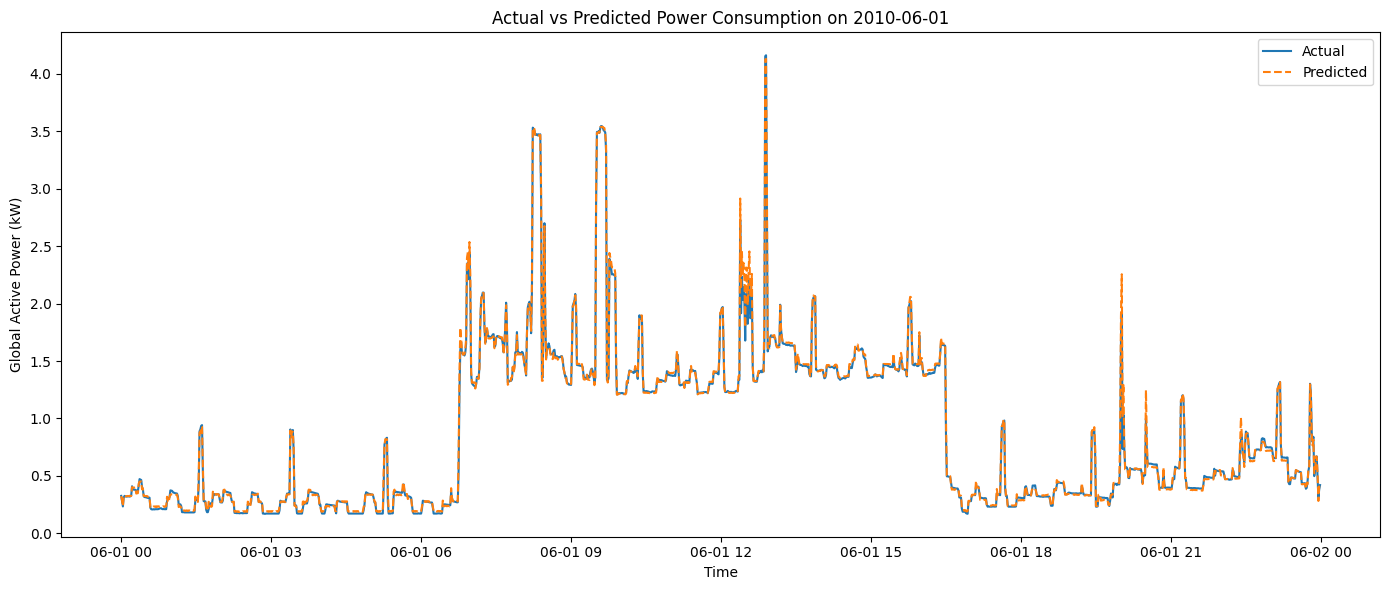

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(result_df.index, result_df['Global_active_power'], label='Actual')
plt.plot(result_df.index, result_df['Predicted_Global_active_power'], label='Predicted', linestyle='dashed')
plt.title('Actual vs Predicted Power Consumption on 2010-06-01')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.tight_layout()
plt.show()